In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("first_round_raway.csv")
df['time'] = pd.to_datetime(df['time'])
df.head()

,time,RawAY
0,2024-10-21 09:21:00.000,30
1,2024-10-21 09:21:00.020,68
2,2024-10-21 09:21:00.050,36
3,2024-10-21 09:21:00.070,52
4,2024-10-21 09:21:00.100,84


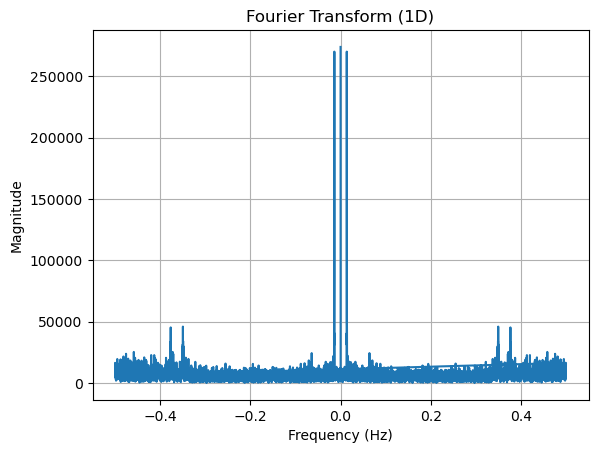

In [3]:
fft_result = np.fft.fft(df.RawAY)
frequencies = np.fft.fftfreq(df.shape[0])
plt.figure()
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform (1D)')
plt.grid()
plt.show()

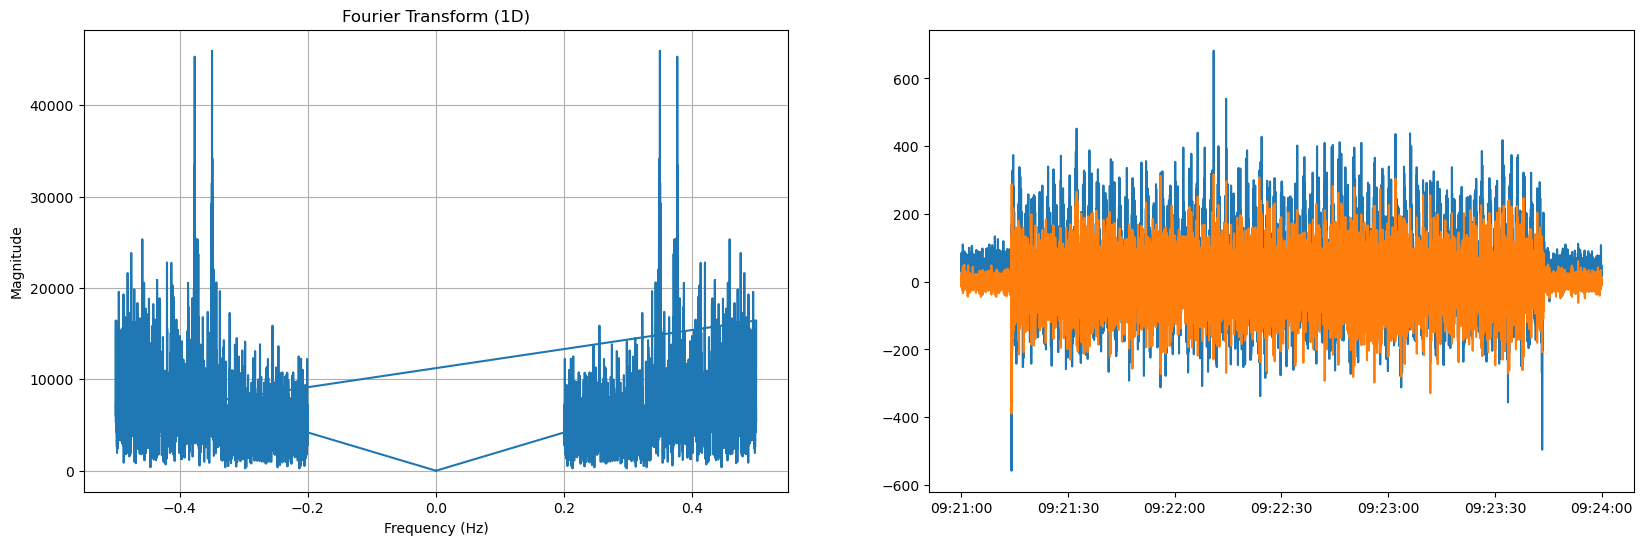

In [9]:
hi_cutoff = 0.2
filter_mask = np.abs(frequencies) > hi_cutoff 
filterred_r = fft_result * filter_mask
filtered_freq = frequencies * filter_mask
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax.plot(filtered_freq, np.abs(filterred_r))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title('Fourier Transform (1D)')
ax.grid()

filtered_data = np.fft.ifft(filterred_r).real
ax2.plot(df.time, df.RawAY, label='raw data')
ax2.plot(df.time, filtered_data, label='hi pass filter')

In [ ]:

#ax2.plot(df.time, df.RawAY, label='oryginal')

ax2.plot(df.time, filtered_data, label='hi pass filter')
ax2.legend()

In [ ]:
ax.plot(filtered_freq, np.abs(filterred_r))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_title('Fourier Transform (1D)')



